In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


![binary_merger](https://cdn.mos.cms.futurecdn.net/7u5yfddeXVJP73NzbtNgnE-1024-80.jpg.webp)

# 0. Binary Stars!

Binary stars are very common in the universe. As a graduate student my work focus on binary stars that evolve to become merging binary black holes!

This project is intended to show you one way astronomers use observations of binary black hole mergers to inform our understanding of the universe.


#### 0a. Watch this "Crash Course" video on binary stars.
https://www.youtube.com/watch?v=pIFiCLhJmig


#### 0b. Watch this video too. It goes more into detail about how binary stars can interact with one another. 

At time=3:46 in the video talks about the complicated evolution of binary stars. 

This is type of evolution is what allows for the formation of binary black hole systems!

https://www.youtube.com/watch?v=AnE9EYgXxpU


#### ~~ Other cool videos about black holes to watch on your own:

2017: Graduate student Katie Bouman describing how her team will take a picture of a super massive black hole
https://www.youtube.com/watch?v=BIvezCVcsYs 

2019: Vox video showing 
https://www.youtube.com/watch?v=pAoEHR4aW8I

#  In this notebook you will be using simulation data from the code COSMIC. 

This code is used to simulate binary evoltion and was developed by graduate students, post-docs, and faculty in CIERA. 

It builds on previous work to model complicated binary evolution very quickly.

Ideally we would model the complicated stellar interactions using fluid simulations like this https://aasnova.org/2016/02/29/featured-image-orbiting-stars-share-an-envelope/ but we don't fully understand the physics involved and those simulations take a long time to finish.

The data I am giving you starts with a large initial popultion of stars with initial conditions that are supposed to replicate binary systems in the universe.

#### 0c. How do you binary systems in the universe look like? Go on Slack and answer the first 3 polls. You aren't supposed to know the answer. This is just to get your brain thinking about binary stars!

# 1. Histograms 

## We are going to be using histograms a lot in this exercise to visualize our binary populations. 1a is supposed to help you become comfortable with them.

A histogram is a helpful way to bin a list of numbers. 



### 1a. use np.random.randint to make a random list of numbers. 

low = lower bound for random numbers

high = upper bound for random numbers

size = how many numbers you want, start with something >20

### 1b. Use plt.hist to bin your random numbers

data = list of random numbers

bins = number of bins

### 1c. Change the number of bins to a large number to see what happends to the data.   

In [3]:
# make a random list of intergers betweeen 2 numbers
data = np.random.randint(low=-100, high=100,size=70)


print(data)

[ 46 -62  70 -39  52  84 -15 -93  92  34 -16   7 -42   1  60 -35  84   3
 -39  -1 -93 -89  43  65  42 -45  16 -77 -75  47  52  19  30  12 -95  -6
  68 -96  35  64  74  38 -13 -74  96  43 -49  57  -2 -99 -52 -45 -90 -23
 -57  62 -74  46 -23  48   1  83  96 -10 -23 -57  46 -49  -2  75]


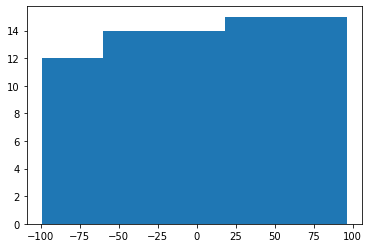

In [4]:
plt.figure()
# feed in the array named data, place the values into 5 bins
h = plt.hist(data, bins=5)

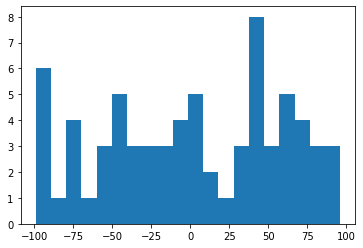

In [5]:
# change the number of bins here
plt.figure()
h = plt.hist(data, bins=20)

# Okay, lets finally read in the COSMIC data.

In [6]:
binaries_initCond = pd.read_hdf('data_lowZ.h5', key='initCond')
binaries_bcm = pd.read_hdf('data_lowZ.h5', key='bcm')
binaries_bpp = pd.read_hdf('data_lowZ.h5', key='bpp')

# binaries_initCond
Gives information about the initial conditions of the binaries.  binaries_initCond will show you one possible answer to the questions on the polls.

You can look at all the available data by seeing what columns you can access:


In [7]:
binaries_initCond.columns

Index(['kstar_1', 'kstar_2', 'porb', 'ecc', 'metallicity', 'binfrac', 'tphysf',
       'mass0_1', 'mass0_2', 'rad1', 'rad2', 'lumin1', 'lumin2', 'massc1',
       'massc2', 'radc1', 'radc2', 'menv1', 'menv2', 'renv1', 'renv2',
       'ospin1', 'ospin2'],
      dtype='object')

You can go to this website to see what some of these columns mean: 
https://cosmic-popsynth.github.io/docs/v3.2.0/output_info/index.html

You can Ctrl+F to search for the column name


##  Play around with the data
### 1d) Make histograms using plt.hist and plots using plt.scatter to see the initial conditions of these binaries.

### 1e) Write a sentence or two about what you see.

For example, if you plot **plt.hist(np.log10(binaries_initCond['porb']), bins=10, color='gray')**
you can write something like: 

"This is the distribution for the initial periods of the binaries.
Large periods mean they start far away from each other, small periods mean they start close together.
Most of the binaries star with small or medium valued orbital periods and fewer start with large orbital periods"

**check if this is true!**

**Some other interesting columns are 'ecc', 'mass0_1, and binaries_initCond['mass0_2']/binaries_initCond['mass0_1']**

## Bonus 

Make your own histogram funtion! (It's a little more ticky than you might have thought!)
There are so many functions that are already made for you but there is value in builing them yourself! This is the best way to really understand what the function is doing


Text(0.5, 0, 'initial orbital period [log(days)]')

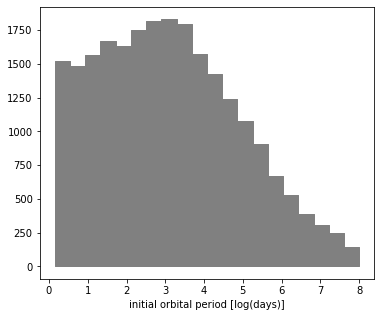

In [8]:
def plot_hist(data, bins ):

    min_val = min(data)
    max_val = max(data)

    bin_edges = np.linspace(min_val, max_val, bins+1) # for 10 bins you need 11 numbers to represent each edge
    num_edges = len(bin_edges)
    bin_vals = []

    for i in range(bins): # -1 because we use i+1 in the code
        count = len(np.where( np.logical_and(data>=bin_edges[i],  data<bin_edges[i+1])  )[0])
        
        if i == (bins-1): # if last bin overwrite count to include the last edge 
            # np.logical_and gives array of true or false
            # np.sum of this array will sum up all the elements where the value is true 
            count = np.sum( np.logical_and(data>=bin_edges[i],  data<=bin_edges[i+1]) )
            
        bin_vals.append(count)
        

    fig = plt.figure(figsize=(6,5))
    for i in range(num_edges-1):
        x = [bin_edges[i], bin_edges[i+1]]
        y_top = bin_vals[i]
        plt.fill_between(x, y_top, y2=0, color='gray')
    return plt, bin_vals
    
data = np.log10(binaries_initCond['porb'])
bins = 20
plt, bin_vals = plot_hist(data, bins )
plt.xlabel('initial orbital period [log(days)]')


Text(0, 0.5, 'count')

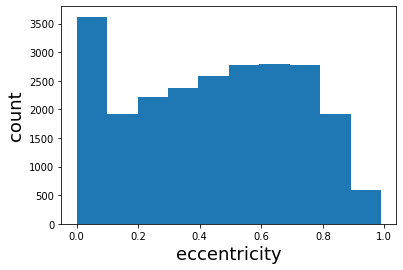

In [9]:
h = plt.hist(binaries_initCond['ecc'])
plt.xlabel('eccentricity', size=18)
plt.ylabel('count', size=18)


Text(0, 0.5, 'count')

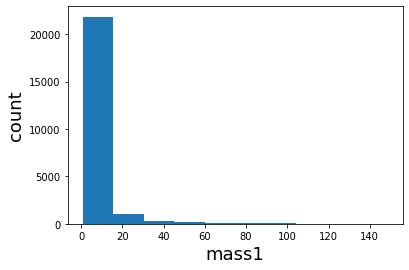

In [10]:
h = plt.hist(binaries_initCond['mass0_1'])
plt.xlabel('mass1', size=18)
plt.ylabel('count', size=18)

Text(0, 0.5, 'count')

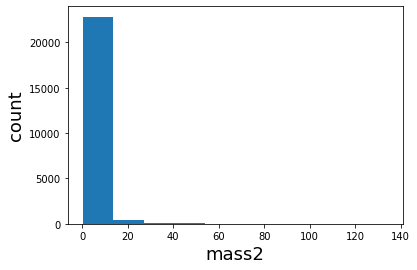

In [11]:
h = plt.hist(binaries_initCond['mass0_2'])
plt.xlabel('mass2', size=18)
plt.ylabel('count', size=18)

Text(0, 0.5, 'count')

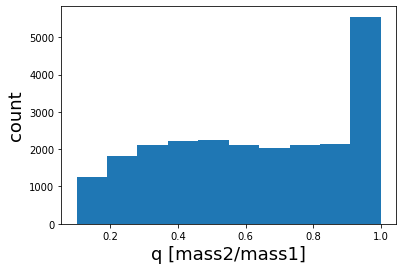

In [12]:
h = plt.hist(binaries_initCond['mass0_2']/binaries_initCond['mass0_1'])
plt.xlabel('q [mass2/mass1]', size=18)
plt.ylabel('count', size=18)

Text(0, 0.5, 'log10(porb)')

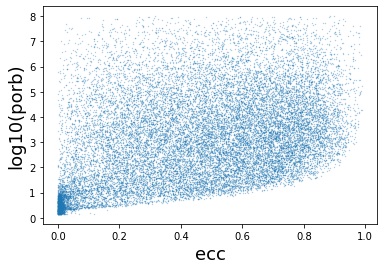

In [13]:
plt.scatter(binaries_initCond['ecc'], np.log10(binaries_initCond['porb']), alpha=0.5, s=0.1)
plt.xlabel('ecc', size=18)
plt.ylabel('log10(porb)', size=18)

Text(0, 0.5, 'log10(porb)')

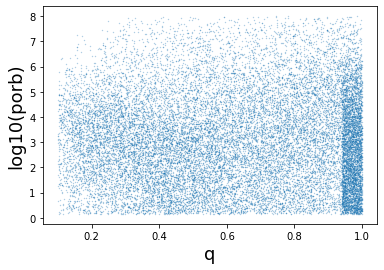

In [14]:
plt.scatter(binaries_initCond['mass0_2']/binaries_initCond['mass0_1'], np.log10(binaries_initCond['porb']), 
            alpha=0.5, s=0.1)
plt.xlabel('q', size=18)
plt.ylabel('log10(porb)', size=18)

# 2 binaries_bcm

binaries_bcm has information about the last timestep in the data, tphys=13700.0. 

It can tell you things like: There is a black hole with a white dwarf. Their orbital period is 5 solar radii and their eccentricity is 0.2

Let's look at the columns again

In [15]:
binaries_bcm.columns

Index(['tphys', 'kstar_1', 'mass0_1', 'mass_1', 'lumin_1', 'rad_1', 'teff_1',
       'massc_1', 'ospin_1', 'RROL_1', 'kstar_2', 'mass0_2', 'mass_2',
       'lumin_2', 'rad_2', 'teff_2', 'massc_2', 'epoch_2', 'ospin_2', 'RROL_2',
       'porb', 'sep', 'ecc', 'SNkick_1', 'SNkick_2', 'SN_1', 'SN_2',
       'bin_state', 'merger_type'],
      dtype='object')

In [16]:
binaries_bcm 

,tphys,kstar_1,mass0_1,mass_1,lumin_1,rad_1,teff_1,massc_1,ospin_1,RROL_1,...,RROL_2,porb,sep,ecc,SNkick_1,SNkick_2,SN_1,SN_2,bin_state,merger_type
bin_num,,,,,,,,,,,,,,,,,,,,,
57,13700.0,11.0,0.850687,0.850715,5.226267e-07,0.009733,1580.164683,0.850715,3.066312e+02,2.087588e-07,...,2.328023e-07,3.803115e+06,120856.222774,0.672393,0.0,0.0,0.0,0.0,0,-001
61,13700.0,15.0,4.663995,0.000000,6.273263e-04,0.000014,245233.035262,0.000000,1.164740e+09,-1.000000e+00,...,1.000000e-04,0.000000e+00,0.000000,-1.000000,0.0,0.0,1.0,1.0,1,0413
73,13700.0,15.0,3.049773,0.000000,3.560416e-05,0.000014,119696.312904,0.000000,6.812509e+08,-1.000000e+00,...,1.000000e-04,0.000000e+00,0.000000,-1.000000,0.0,0.0,1.0,1.0,1,0413
83,13700.0,11.0,0.834072,0.835101,5.267010e-07,0.009910,1569.031531,0.835101,1.129587e+04,1.455274e-06,...,1.555602e-06,2.149002e+05,17773.893375,0.416579,0.0,0.0,0.0,0.0,0,-001
148,13700.0,13.0,11.017151,1.329118,1.299599e-10,0.000014,5231.881577,1.329118,5.195469e+06,1.000000e-04,...,-1.000000e+00,0.000000e+00,0.000000,-1.000000,0.0,0.0,1.0,0.0,1,0201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949836,13700.0,11.0,1.108969,1.118350,6.028620e-07,0.006692,1974.865850,1.118350,8.130870e+05,9.392357e-07,...,1.073347e-06,1.985603e+05,18552.596515,0.413447,0.0,0.0,0.0,0.0,0,-001
949854,13700.0,12.0,1.207503,1.208532,6.503807e-07,0.004840,2366.667807,1.208532,2.057535e+07,7.491571e-05,...,9.710139e-05,1.646632e+02,167.619593,0.000000,0.0,0.0,0.0,0.0,0,-001
949933,13700.0,15.0,0.649103,0.000000,4.158951e-04,0.012133,7516.830378,0.649103,3.167160e+06,-1.000000e+00,...,1.000000e-04,0.000000e+00,0.000000,-1.000000,0.0,0.0,0.0,0.0,1,1111


In [17]:
# this is how you would look at all the values from 'RROL_2'
binaries_bcm['RROL_2'].values

array([2.32802302e-07, 1.00000000e-04, 1.00000000e-04, ...,
       1.00000000e-04, 1.00000000e-04, 1.05201319e-05])

### Using **binaries_initCond** and **binaries_bcm** we can see the initial and final snapshot of each binary. 

### 2a) Using binaries_initCond find the total mass in stellar objects in the initial conditions
for binaries_initCond you will want to use the columns mass0_1 and mass0_2

you can use np.sum() to sum up all the values

### 2b) Go on Slack and fill out the 3th poll. It asks how much initial mass you found. What are the units?

### 2c) Using binaries_bcm find the total mass in stellar object in the final conditions
for binaries_bcm you will want to use the columns mass_1 and mass_2

You can put each index value in an array by doing the following

In [18]:
mass1_initial_total = np.sum(binaries_initCond['mass0_1'].values)
mass2_initial_total = np.sum(binaries_initCond['mass0_2'].values)

total_initial_mass = mass1_initial_total+mass2_initial_total
print(total_initial_mass)

207311.07330794935


In [19]:
mass1_final_total = np.sum(binaries_bcm['mass_1'].values)
mass2_final_total = np.sum(binaries_bcm['mass_2'].values)

total_final_mass = mass1_final_total+mass2_final_total
print(total_final_mass)

60543.33985742093


### 2d. Find the ratio of final mass in all binaries to the initial mass.
This gives you the fraction of mass that is remaining. It should be less than one. 


In [20]:
frac_lost = total_final_mass/total_initial_mass
print(frac_lost)

0.2920410323064947


### 2e  Go on Slack and fill out the poll asking what you got for the fraction. 

### 2f Fill out the poll requesting ideas about how the mass was ejected.

## Lets look at specific rows in binaries_bcm

How do we access the same binary in binaries_initCond and binaries_bcm?

Each binary has its own unique number. In this data frame the unique number is its index value (the first column called bin_num). Run this cell to see

In [21]:
binaries_bcm

,tphys,kstar_1,mass0_1,mass_1,lumin_1,rad_1,teff_1,massc_1,ospin_1,RROL_1,...,RROL_2,porb,sep,ecc,SNkick_1,SNkick_2,SN_1,SN_2,bin_state,merger_type
bin_num,,,,,,,,,,,,,,,,,,,,,
57,13700.0,11.0,0.850687,0.850715,5.226267e-07,0.009733,1580.164683,0.850715,3.066312e+02,2.087588e-07,...,2.328023e-07,3.803115e+06,120856.222774,0.672393,0.0,0.0,0.0,0.0,0,-001
61,13700.0,15.0,4.663995,0.000000,6.273263e-04,0.000014,245233.035262,0.000000,1.164740e+09,-1.000000e+00,...,1.000000e-04,0.000000e+00,0.000000,-1.000000,0.0,0.0,1.0,1.0,1,0413
73,13700.0,15.0,3.049773,0.000000,3.560416e-05,0.000014,119696.312904,0.000000,6.812509e+08,-1.000000e+00,...,1.000000e-04,0.000000e+00,0.000000,-1.000000,0.0,0.0,1.0,1.0,1,0413
83,13700.0,11.0,0.834072,0.835101,5.267010e-07,0.009910,1569.031531,0.835101,1.129587e+04,1.455274e-06,...,1.555602e-06,2.149002e+05,17773.893375,0.416579,0.0,0.0,0.0,0.0,0,-001
148,13700.0,13.0,11.017151,1.329118,1.299599e-10,0.000014,5231.881577,1.329118,5.195469e+06,1.000000e-04,...,-1.000000e+00,0.000000e+00,0.000000,-1.000000,0.0,0.0,1.0,0.0,1,0201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949836,13700.0,11.0,1.108969,1.118350,6.028620e-07,0.006692,1974.865850,1.118350,8.130870e+05,9.392357e-07,...,1.073347e-06,1.985603e+05,18552.596515,0.413447,0.0,0.0,0.0,0.0,0,-001
949854,13700.0,12.0,1.207503,1.208532,6.503807e-07,0.004840,2366.667807,1.208532,2.057535e+07,7.491571e-05,...,9.710139e-05,1.646632e+02,167.619593,0.000000,0.0,0.0,0.0,0.0,0,-001
949933,13700.0,15.0,0.649103,0.000000,4.158951e-04,0.012133,7516.830378,0.649103,3.167160e+06,-1.000000e+00,...,1.000000e-04,0.000000e+00,0.000000,-1.000000,0.0,0.0,0.0,0.0,1,1111


In [22]:
# binaries_bcm.index gives you the numbers, adding .values at the end puts it in to an array
# binaries_bcm.index.values

binary_index_vals = binaries_bcm.index.values
binary_index_vals

array([    57,     61,     73, ..., 949933, 949947, 949952])

In [23]:
# you can access the elements in the array by doing:

print('0th element', binary_index_vals[0])
print('1st element', binary_index_vals[1])

0th element 57
1st element 61


## If you have the row's index number (binary_index_vals = binaries_bcm.index.values) you use .loc to access the data for that index

In [24]:
print(binaries_bcm.loc[binary_index_vals[0]])

# remember binary_index_vals[0] will give you the unique binary values

tphys                13700
kstar_1                 11
mass0_1           0.850687
mass_1            0.850715
lumin_1        5.22627e-07
rad_1           0.00973263
teff_1             1580.16
massc_1           0.850715
ospin_1            306.631
RROL_1         2.08759e-07
kstar_2                 11
mass0_2           0.786266
mass_2            0.786266
lumin_2        5.96837e-07
rad_2            0.0104698
teff_2             1574.94
massc_2           0.786266
epoch_2            3077.56
ospin_2        5.52499e-06
RROL_2         2.32802e-07
porb           3.80312e+06
sep                 120856
ecc               0.672393
SNkick_1                 0
SNkick_2                 0
SN_1                     0
SN_2                     0
bin_state                0
merger_type           -001
Name: 57, dtype: object


Lets look at the final and initial values for one binary

In [25]:
print('Looking at initial conditions:')
print(binaries_initCond.loc[binary_index_vals[2]],'\n')


print('Looking at final conditions:')
print(binaries_bcm.loc[binary_index_vals[2]])

# you might get some weird output for the binaries_initCond. This is because I am using an older version of COSMIC
# and the developed probably fixed that in the newer version

Looking at initial conditions:
kstar_1            1.000000
kstar_2            1.000000
porb              28.265150
ecc                0.221538
metallicity        0.000100
binfrac            0.842596
tphysf         13700.000000
mass0_1            9.186827
mass0_2            3.766896
rad1               0.000000
rad2               0.000000
lumin1             0.000000
lumin2             0.000000
massc1             0.000000
massc2             0.000000
radc1              0.000000
radc2              0.000000
menv1              0.000000
menv2              0.000000
renv1              0.000000
renv2              0.000000
ospin1             0.000000
ospin2             0.000000
Name: 73, dtype: float64 

Looking at final conditions:
tphys                13700
kstar_1                 15
mass0_1            3.04977
mass_1                   0
lumin_1        3.56042e-05
rad_1              1.4e-05
teff_1              119696
massc_1                  0
ospin_1        6.81251e+08
RROL_1                  -1

## IMPORTANT: look before moving on



So far you have looked at entire columns in the data but what if you only want one row in one column?

.iloc and .loc are used for that **BUT** .iloc and .loc are very different.

.iloc doesn't care about the index (in this case the unique bin_num) of the row. It only cares about the position of the row in the data, similar to how you access a normal array. Use this when you want to call data as if it were in an array

.loc is used with the row index (in this case the unique bin_num). 

make sure you understand this before moving on!

There are different ways to access specific rows in your columns. These are the ways it makes the most sense to me:

In [26]:
# here I look at the column named rad_1
print('Entire column:')
print(binaries_bcm['rad_1'])

# putting the unique index/bin_num values in an array
binary_index_vals = binaries_bcm.index.values

# here I look at the column rad_1 but only the first row.
# to access the first row with loc we use the row's index value: index value = binary_index_vals[0]
# remember, since we are using the index values we have to use loc, not iloc
print(' -----------')
print('Just first row with .loc')
index_value = binary_index_vals[0]
print('index value = ', index_value)
print(binaries_bcm['rad_1'].loc[index_value])


# to access the first row with iloc we can access it like a numpy array
print(' -----------')
print('Just first row with .iloc')
i_value = 0
print(binaries_bcm['rad_1'].iloc[i_value])

Entire column:
bin_num
57        0.009733
61        0.000014
73        0.000014
83        0.009910
148       0.000014
            ...   
949836    0.006692
949854    0.004840
949933    0.012133
949947    0.009173
949952    0.006618
Name: rad_1, Length: 23561, dtype: float64
 -----------
Just first row with .loc
index value =  57
0.009732631872969551
 -----------
Just first row with .iloc
0.009732631872969551


### Another important note:

Think carefully when you want to use .iloc or .loc.

If you are just looking in one data frame then .iloc is probably fine.

If you want to access the same binary in the datafram binaries_bcm and binaries_initCond it is better to use .loc. You can use .iloc BUT are you sure that .iloc[0] will give you the same binary every time? It is much more safe to use .loc because you know that the index values are unique to each binary.

# 3. Mass in black holes

The point of this section is to get more comfortable with the accessing the data. 

### 3a) Use binaries_bcm to find the total mass in the last snapshot that is only in black holes.

Tip: You can do this using a for loop but it can be done MUCH faster if you use something like np.where()
Look at this stack overflow link on np.where https://stackoverflow.com/questions/34667282/numpy-where-detailed-step-by-step-explanation-examples

You can find which objects are black holes using the "kstar_1" and "kstar_2" columns. Here is what the numbers represent. 

https://cosmic-popsynth.github.io/docs/v3.2.0/output_info/index.html


In [27]:
# here is a mini tutorial if you are stuck using np.where


a = np.arange(0,10)
print('a =', a, '\n')

print('I want to find the indicies where this condition is met a<5.')
print('a<5 =', a<5, '\n')

print('Using np.where like this will give you the indicies where the condition is met')
where_true = np.where(a<5)[0]
print('np.where(a<5)[0] = ', where_true, '\n')

print('Now I can go back to my array "a" and call those elements')
print(a[where_true])


a = [0 1 2 3 4 5 6 7 8 9] 

I want to find the indicies where this condition is met a<5.
a<5 = [ True  True  True  True  True False False False False False] 

Using np.where like this will give you the indicies where the condition is met
np.where(a<5)[0] =  [0 1 2 3 4] 

Now I can go back to my array "a" and call those elements
[0 1 2 3 4]


In [28]:
kstar1_bh = np.where( binaries_bcm['kstar_1'] == 14)[0] # to use with iloc
kstar2_bh = np.where( binaries_bcm['kstar_2'] == 14)[0] # to use with iloc

In [29]:
mass_bh_1 = np.sum(binaries_bcm['mass_1'].iloc[kstar1_bh].values)
mass_bh_2 = np.sum(binaries_bcm['mass_2'].iloc[kstar2_bh].values)

In [30]:
total_mass_bh = mass_bh_1 + mass_bh_2
print(total_mass_bh)

27381.067755310098


### 3b What is the fraction of BH mass at the end of simulation to the total mass at the end of the simulation?

In [31]:
frac_bh = total_mass_bh/total_final_mass
print(frac_bh)

0.4522556538802169


### 3c) Go to Slack and answer the poll asking what fraction you got.

# 4. A look at the bpp


### We need to learn how to use binaries_bpp

binaries_bcm and binaries_iniCond have just one row for each binary. 

binaries_bpp contains multiple rows for each binary. Every row is a different time and represents a key evolutionary change. 

In [32]:
binaries_bpp

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,evol_type,Vsys_1,Vsys_2,SNkick,SNtheta,rad_1,rad_2
bin_num,,,,,,,,,,,,,,,
57,1201.537390,1.670580,1.247745,2.0,1.0,67570.039620,1.190755e+06,0.672522,2.0,0.0,0.0,0.0,0.0,2.360611,1.011703
57,1213.674854,1.670503,1.247745,3.0,1.0,67571.809920,1.190817e+06,0.672522,2.0,0.0,0.0,0.0,0.0,9.123595,1.012745
57,1236.250622,1.667480,1.247745,4.0,1.0,67641.888698,1.193288e+06,0.672522,2.0,0.0,0.0,0.0,0.0,13.450893,1.014711
57,1338.601281,1.663147,1.247745,5.0,1.0,67742.579782,1.196843e+06,0.672522,2.0,0.0,0.0,0.0,0.0,20.173435,1.024078
57,1342.434531,1.658364,1.247745,6.0,1.0,67854.061223,1.200786e+06,0.672522,2.0,0.0,0.0,0.0,0.0,135.405199,1.024444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949952,2432.266884,1.095125,1.329837,11.0,4.0,2353.857808,8.493284e+03,0.000008,2.0,0.0,0.0,0.0,0.0,0.006967,10.874442
949952,2536.139153,1.095125,1.325005,11.0,5.0,2358.553071,8.527208e+03,0.000008,2.0,0.0,0.0,0.0,0.0,0.006967,19.330733
949952,2540.312820,1.095150,1.320470,11.0,6.0,2362.873996,8.558631e+03,0.000008,2.0,0.0,0.0,0.0,0.0,0.006967,110.957060


Lets once again get the unique index values so that we can access different binaries.

In [33]:
# put the index values in a numpy array for easy access
binary_index_not_unique_values = binaries_bpp.index.values 
binary_index_not_unique_values

array([    57,     57,     57, ..., 949952, 949952, 949952])

In [34]:
# this time we need to use np.unique since many rows have the same index
binary_index = np.unique(binaries_bpp.index.values )
binary_index

array([    57,     61,     73, ..., 949933, 949947, 949952])

In [35]:
# remember, since we are using the index values we have to use loc, NOT iloc
binaries_bpp.loc[binary_index[0]]

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,evol_type,Vsys_1,Vsys_2,SNkick,SNtheta,rad_1,rad_2
bin_num,,,,,,,,,,,,,,,
57,1201.537390,1.670580,1.247745,2.0,1.0,67570.039620,1.190755e+06,0.672522,2.0,0.0,0.0,0.0,0.0,2.360611,1.011703
57,1213.674854,1.670503,1.247745,3.0,1.0,67571.809920,1.190817e+06,0.672522,2.0,0.0,0.0,0.0,0.0,9.123595,1.012745
57,1236.250622,1.667480,1.247745,4.0,1.0,67641.888698,1.193288e+06,0.672522,2.0,0.0,0.0,0.0,0.0,13.450893,1.014711
57,1338.601281,1.663147,1.247745,5.0,1.0,67742.579782,1.196843e+06,0.672522,2.0,0.0,0.0,0.0,0.0,20.173435,1.024078
57,1342.434531,1.658364,1.247745,6.0,1.0,67854.061223,1.200786e+06,0.672522,2.0,0.0,0.0,0.0,0.0,135.405199,1.024444
57,1344.725939,0.850687,1.247942,11.0,1.0,94159.469909,2.309861e+06,0.672414,2.0,0.0,0.0,0.0,0.0,0.009733,1.024684
57,2835.164802,0.850687,1.247942,11.0,2.0,94159.469909,2.309861e+06,0.672414,2.0,0.0,0.0,0.0,0.0,0.009733,3.874018
57,2863.799728,0.850687,1.247840,11.0,3.0,94164.037043,2.310085e+06,0.672414,2.0,0.0,0.0,0.0,0.0,0.009733,5.986008
57,2964.504752,0.850687,1.234795,11.0,4.0,94753.066971,2.339076e+06,0.672414,2.0,0.0,0.0,0.0,0.0,0.009733,9.950677


### 4a) Choose any binary you want. Make a plot  showing how the mass of the primary star "mass_1" changes over time "tphys".  Make sure you label you plots! What are the units?


**Tips:** 

You can access the data by doing:

binaries_bpp["column_name"].loc[binary_index_num].values

Text(0, 0.5, 'mass_1 [solar masses]')

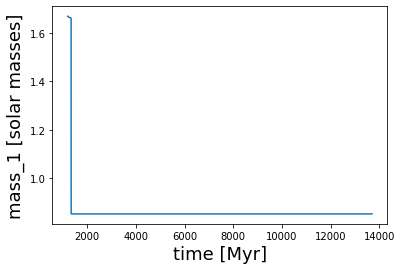

In [36]:
x = binaries_bpp["tphys"].loc[binary_index[0]].values
y = binaries_bpp["mass_1"].loc[binary_index[0]].values

plt.plot(x, y)
plt.xlabel('time [Myr]', size=18)
plt.ylabel('mass_1 [solar masses]', size=18)

### 4b) Make a plot showing how the mass of the primary star "mass_1" and secondary star "mass_2" changes over time "tphys". Add labels so you can tell them apart

### Look through the binaries until you find a system like this:

<img src="mass_evolution.png">

### One mass is increasing while the other decreases. From the videos you watched, can you describe what is happening?

### 4c) Go to Slack and fill out the free response poll asking what binary interaction explains the changes in mass

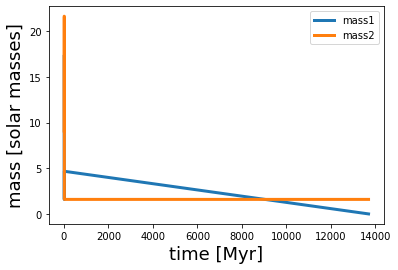

In [37]:
i = 1
x = binaries_bpp["tphys"].loc[binary_index[i]].values
y1 = binaries_bpp["mass_1"].loc[binary_index[i]].values
y2 = binaries_bpp["mass_2"].loc[binary_index[i]].values

plt.plot(x, y1, label='mass1', linewidth=3)
plt.plot(x, y2, label='mass2', linewidth=3)
plt.xlabel('time [Myr]', size=18)
plt.ylabel('mass [solar masses]', size=18)
plt.legend()

# 5. Merging Binary Black holes

### Now lets do something more challenging!


The goal of this section is for you to find out which binary black hole systems will merge within a Hubble time. 

Hubble time = the age of the universe = 13.8 billion years

### 5a) Calculate which binary black hole systems will merge within the age of the universe
### You need to create 3 arrays. 

- array to store the binary index 

- array to store the mass of the most massive BH before merger

- array to store the smaller mass. 

A guide/tips: 

#### 1) You will need to access each binary similar to how you made the plots:

binaries_bpp["column_name"].loc[binary_index_number].values


#### 2) You need to check that both objects are black holes **kstar_1 == 14** and **kstar_2 == 14** in the last timestep

To look at the last element in an array you use array[-1]

Here it looks like binaries_bpp['column_name'].loc[binary_index_number].values**[-1]**

or 

np.array(binaries_bpp['column_name'].loc[binary_index_number])**[-1]**

#### 3) You need to get the values of eccentricity, separation, M1, M1, and time in the last timestep. Put them in CGS units
http://www.astro.wisc.edu/~dolan/constants.html


#### 4) Calculate t_merger
For circular orbits 

$$ t_{\rm merger, circular} = \frac{a^4}{4 \beta} $$

where $\beta = \frac{64}{5} \frac{G^3 m_1 m_2 (m_1 + m_2)}{c^5}$, $a$ is separation.


For eccentricity < 0.5 use:


$$ t_{\rm merger} = \frac{c_{0}^4 }{4 \beta} e ^{48/19} $$

for eccentricity > 0.5 use:

$$ t_{\rm merger} = \frac{768}{425} t_{\rm merger, circular} (1 - e^2)^{7/2} $$

***These equations are from a paper from 1964! https://ui.adsabs.harvard.edu/abs/1964PhRv..136.1224P/abstract***

*** Notes:  ***

 - Some eccentricities = -1. This is not physical and means the black holes are not orbiting each other anymore. Find a way to ignore these. 

- You will have to keep track of the units. To do this you can change all simulation variables to cgs. The output of your t_merger calcuations will be in seconds

#### 5) Add your calculated t_merger to the time in the last timestep. Check if that sum is less than the age of the universe, 13.8 billion years. (remember that your t_merger is in seconds )

#### 6) If the time is less than 13.8 billion years, congratulations! You found a merging black hole binary system! 

#### 7) When you find a merging system save its data! In one array save the index of the merging binary. In another array save the mass of the more massive black hole before the merger, this is called the primary BH. In another array save the mass of the lower mass BH, this one is called the secondary  

In [38]:
# it is much easier and neater to write up equations in a function 
# when you are trying to calculate something many times

# see how you can make a function here 
def number_squared( x ):
    return x**2


# you can call functions inside other functions
def divide_by_2_after_square(x):
    squared = number_squared(x)
    return squared/2

number = 10 
print(number_squared( number ))
print(divide_by_2_after_square( number ))

print('*****NOTE****')
print('this is NOT how you should calculate (x**2) / 2')
print('this is just an example of how you may use functions for this exercise')

100
50.0
*****NOTE****
this is NOT how you should calculate (x**2) / 2
this is just an example of how you may use functions for this exercise


In [39]:
# Here is the function for beta to get you started
# just fill in the values for G and c in cgs  http://www.astro.wisc.edu/~dolan/constants.html



def calc_beta(m1,m2):
    G = 6.67259e-8
    c = 2.99792458e10
    return (64./5.) * ( (G**3 * m1 * m2 * (m1+m2) ) /c**5 )

def calc_t_merger_circular(m1, m2, a):
    '''
    Requires: m1, m2, a
    '''
    beta = calc_beta(m1,m2)
    return (a**4) / (4 * beta)
    
def calc_t_merger_small_e(m1, m2, a, e):
    # for e<0.5
    c0 = a*(1-e**2)/(e**(12./19.)*(1+(121./304.)*e**2)**(870./2299.))
    beta = calc_beta(m1,m2)
    return (c0**4)/(4* beta) * e**(48./19.)

def calc_t_merger_big_e(m1, m2, a, e):
    # for e>0.5
    t_merger_circular = calc_t_merger_circular(m1,m2,a)
    
    return (768/425) * t_merger_circular * (1-e**2)**(7./2.)

In [40]:
binary_index = binaries_initCond.index.values
Msun = 1.99e33
Rsun = 6.96e10
sec_in_year = 3.154e7

# rememeber than you can also get the same index values using:
# binary_index = np.unique(binaries_bpp.index.values)
# we have to use np.unique because the bpp can have many rows per binary

merging_binaries=[]
primary_mass = []
secondary_mass = []

for index in binary_index:
    
    if binaries_bpp['kstar_1'].loc[index].values[-1] == 14:

        if binaries_bpp['kstar_2'].loc[index].values[-1] == 14:
            m1 = binaries_bpp['mass_1'].loc[index].values[-1] * Msun
            m2 = binaries_bpp['mass_2'].loc[index].values[-1] * Msun
            a = binaries_bpp['sep'].loc[index].values[-1] * Rsun
            e = binaries_bpp['ecc'].loc[index].values[-1]
            t = binaries_bpp['tphys'].loc[index].values[-1]*1e6
            
            if e == -1:
                print('this binary has disrupted!')
                t=1e20 # making this one have an incredibly long merger time

            if e <= 0.5: 
                t_merger = calc_t_merger_small_e(m1, m2, a, e)/sec_in_year
                t=t+t_merger
                
            if e > 0.5: 
                t_merger = calc_t_merger_big_e(m1, m2, a, e)/sec_in_year
                t=t+t_merger
                
            if t < 13.7e9: # hubble time in billion years
                merging_binaries.append(index)
                two_masses = [m1/Msun, m2/Msun]
                
                primary_mass.append(max(two_masses))
                secondary_mass.append(min(two_masses))

this binary has disrupted!
this binary has disrupted!


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


this binary has disrupted!
this binary has disrupted!


### 5b) Find the fraction of binaries from your initial population that resulted in BBH mergers.

- Sum up the total number of binary black hole mergers. 
- Divide that number by the total number of initial binaries in the population.
    - Hint: Remember that each binary has a unique index.

In [41]:
num_BBH_merger = len(merging_binaries)
num_initial_binaries = len(binary_index)
fraction = num_BBH_merger/num_initial_binaries
print(fraction)

0.002461695174228598


### 5c) Go to Slack and fill out the anonymous Poll 7 asking: what fraction of the initial binaries merged as BBHs.

# 6a. Use plt.hist to compare the initial conditions of the binaries that ended up merging to the initial conditions of the entire population

Tips:
- you should probably make two different histograms inside of plotted one on top of the other


Text(0.5, 1.0, 'initial condition of bbh merger population')

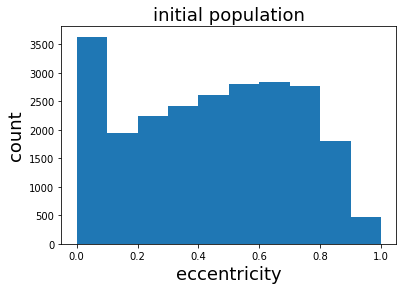

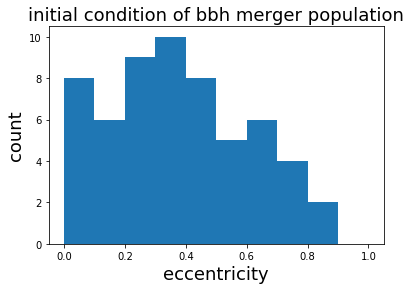

In [42]:
plt.figure()
h = plt.hist(binaries_initCond['ecc'], range=(0,1))
plt.xlabel('eccentricity', size=18)
plt.ylabel('count', size=18)
plt.title('initial population', size=18)

plt.figure()
h = plt.hist(binaries_initCond['ecc'].loc[merging_binaries], range=(0,1))
plt.xlabel('eccentricity', size=18)
plt.ylabel('count', size=18)
plt.title('initial condition of bbh merger population', size=18)

Text(0.5, 1.0, 'initial condition of bbh merger population')

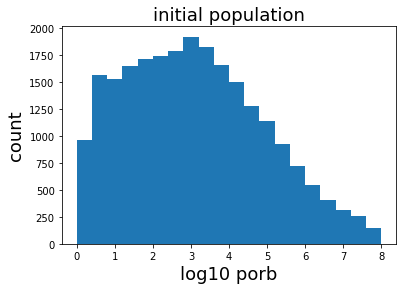

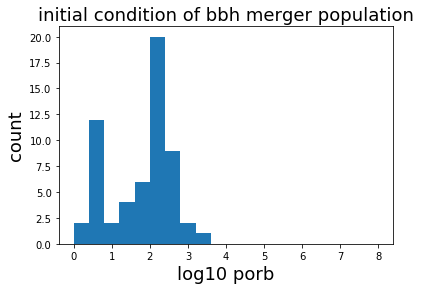

In [43]:
plt.figure()
h = plt.hist(np.log10(binaries_initCond['porb']), range=(0,8),bins=20)
plt.xlabel('log10 porb', size=18)
plt.ylabel('count', size=18)
plt.title('initial population', size=18)
plt.figure()
h = plt.hist(np.log10(binaries_initCond['porb'].loc[merging_binaries]), range=(0,8),bins=20)
plt.xlabel('log10 porb', size=18)
plt.ylabel('count', size=18)
plt.title('initial condition of bbh merger population', size=18)

### 6b) Make a histogram of only the primary masses you saved (the more massive BH). 

- remember, you were asked to save the index of the binaries that merged and the mass of the more massive black hole before the merger

Text(0.5, 1.0, 'BH masses before merger')

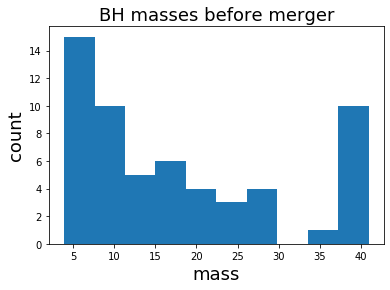

In [44]:
h = plt.hist(primary_mass)
plt.xlabel('mass', size=18)
plt.ylabel('count', size=18)
plt.title('BH masses before merger', size=18)

### 6c) compare your plot to this one. 

![primary_mass](https://www.ligo.org/science/Publication-O2BBHPop/images/fig2.png)



This plot shows the rate of BBH mergers per volume per year per primary mass. You can think of this plot as how likely you are to see a binary black hole merger with a specific primary mass. This plot was made using LIGO observations of real BBH mergers. The different colors correspond to different models. Each model has different assuptions, just to name a few: Model A assumed that BHs with masses below 5$M_{\odot}$ do not exist. Model B assumed a different initial distribution of black holes.


Your histogram is similar to this plot because a histogram can tell you there are many more mergers with primary masses around 5$M_{\odot}$. This is similar to saying, if you had to guess it is more likely you will see a BBH merger with a primary mass around 5$M_{\odot}$.

This is not a perfect comparison but it is good enough! What comments can you make about it?

This figure comes from this paper: https://dcc.ligo.org/public/0156/P1800324/009/O2RandP.pdf you don't have to read it. it is just for your reference

### 6d) Make a histogram of the mass ratio, q = secondary_mass/primary_mass

If your numbers are in an array you can simply divide the arrays. 

Text(0.5, 1.0, 'BH masses before merger')

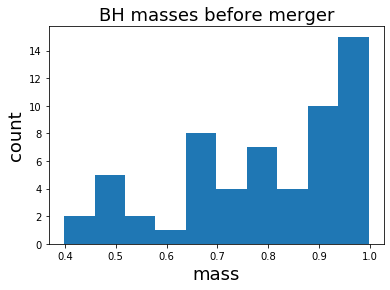

In [45]:
q = np.array(secondary_mass)/np.array(primary_mass)

h = plt.hist(q)
plt.xlabel('mass', size=18)
plt.ylabel('count', size=18)
plt.title('BH masses before merger', size=18)

### 6e) Compare your plot to this one



<img src="q_distribution.png">

This plot shows the rate of BBH mergers per volume per year per **mass ratio**. This is the same as the first plot. Again, you can think of this plot as how likely you are to see a binary black hole merger with a specific **mass ratio**. The colors here correspond to the same models as above. 


What comments can you make about this comparison?

### 6f) Read this short article on the mass distribution of the resulting BH mass after a merger.

https://aasnova.org/2019/07/10/exploring-a-black-hole-mass-conundrum/



### 6g) Make a histogram of the resulting BH mass in each merger.

If your numbers are in an array you can simply add them. Adding arrays will add the numbers element by element

In [46]:
total_mass = np.array(secondary_mass)+np.array(primary_mass)


Text(0.5, 1.0, 'BH masses before merger')

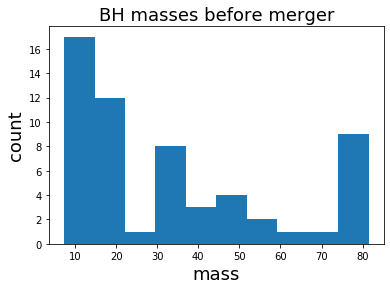

In [47]:
h = plt.hist(total_mass)
plt.xlabel('mass', size=18)
plt.ylabel('count', size=18)
plt.title('BH masses before merger', size=18)

### 6h) Compare your plot to this




<img src="https://3iom3142cnb81rlnt6w4mtlr-wpengine.netdna-ssl.com/wp-content/uploads/2019/07/apjlab2336f5_hr.jpg" style="width:30vw">

This is the last plot from the article you read.

It comes from this scientific paper https://arxiv.org/pdf/1901.03345.pdf. You don't have to read this

In this plot the y-axis shows a similar idea to the last image. It shows model predictions for the distribution of the observed total mass of 10 mergers. Similar to the last image you can think of it as how likely you will be to see a certain distribution of total masses. The different colors are again different models. The black line is the observed value from LIGO detections.

This is not a perfect comparison but it is good enough! What comments can you make about your total mass distribution and the figure?


## 7. Do this same comparison with different initial populations.

#### This is meant for you to see how your results can change if you make different assumptions about the initial population.
#### Changing parameters like this is one way astronomers can tune their assumptions to better match observations. This helps us have a better understanding of the universe by ruling out assumptions that don't match observations.

**data_diff_imf.h5** has a completely different initial population of the binaries. The initial orbital periods, eccentricities, and mass ratios, among others.

**data_lowZ.h5** has a different metallicity. It is 100x smaller amount of metals

**data_wkicks.h5** this one includes "kicks". When stars explode as super nova the explosion can "kick" the remaining black hole.